## 일원분산 분석 개여
- 목적 : 셋 이상의 그룹 간 차이가 존재하는지를 확인하기 위한 가설 검정 방법
- 영가설 : 세그룹의 표본평균은 같음
- 대립가설 : 최소한  한 개 그룹에는 차이를 보임

## 선행조건
- 독립성 : 모든 그룹은 서로 독립적
- 정규성 : 데이터는 정규분포를 따라야 함
    - 만약, 정규성을 띄지 않으면 비모수적인 방법인 부호검정 을 진행
    
- 등분산성 : 두 그룹의 데이터에 대한 분산이 같아야 함
    - Levene의 등분산 검정 : p-value가 0.05 미만이면 분산이 다르다고 판단
    - 분산이 같은지 다른지에 따라 사용하는 통계량이 달라지므로, 비모수적인 방법을 수행

![](../picture/일원통계.png)

![](../picture/일원분산절차.png)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *

%precision 3
np.random.seed(1111)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 데이터 불러오기
df = pd.read_csv("../data/지점별_일별판매량.csv", engine = "python", encoding='euc-kr')
df.head()


,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


- 각 지점의 판매량의 평균 차이가 있는지 확인
- 변수가 2개를 초과하므로 아노바분석 (일원분산분석)

    - 귀무가설 : 모든 그룹의 평균이 같다
    - 대립가설 : 최소한 한개 그룹이라도 평균이 다르다

## 지점별 7월 판매량 간의 유의미한 차이가 있는가?

- 정규성을모든집단에 대해 정규성검사해서 정규성이 없으면 다른분석
- 모든 집단에 대해 등분산확인 후 분산이 같지않으면 다른 분석

- ===>Kruskal-Wallis H Test를 수행해야 함(비모수적인방법)


In [4]:
df

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222
5,6,149,140,238
6,7,140,146,218
7,8,142,122,200
8,9,124,160,186
9,10,166,157,188


In [5]:
# 데이터 분할 (결측치 제거)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x1f577372610>,
 'caps': [<matplotlib.lines.Line2D at 0x1f577372cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f577372280>,
 'medians': [<matplotlib.lines.Line2D at 0x1f57737c3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f57737c730>,
 'means': []}

([<matplotlib.axis.XTick at 0x1f577349b50>,
 [Text(1, 0, '지점A'), Text(2, 0, '지점B'), Text(3, 0, '지점C')])

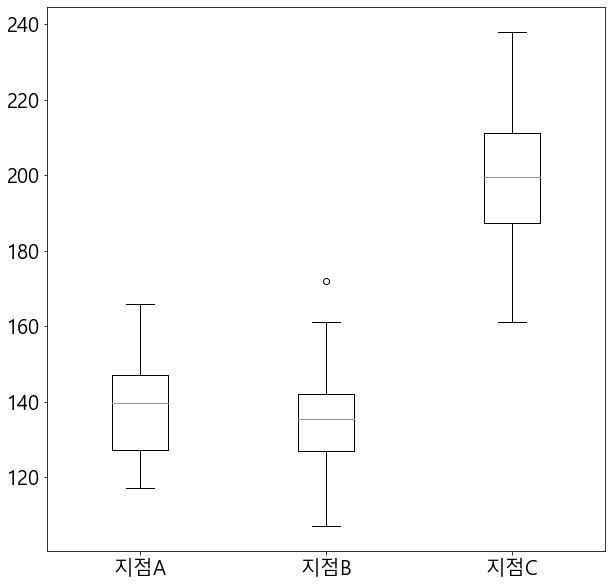

In [13]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)

p1 = ['지점A','지점B','지점C']

plt.boxplot([A,B,C])

plt.xticks([1,2,3],p1) # plt.xticks([1,2,3],['A','B','C']) 동일한 표현

In [14]:
# 정규성 검정
#pvalue가 유의수준보다 작으므로 정규분포를 띈다

kstest(A, 'norm')
kstest(B, 'norm')
kstest(C, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

KstestResult(statistic=1.0, pvalue=0.0)

In [15]:
# 등분산성 검정
levene(A,B,C)
# pvalue가 0.05보다 크므로 귀무가설 채책(세그룹의 분산 동일)

LeveneResult(statistic=1.244640322359082, pvalue=0.2931218868935245)

In [16]:
f_oneway(A,B,C)
#pvalue가 거의 0에 수렴 => A,B,C 평균에서 최소 어느 한 집단은 유의한 차이가 존재

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)

In [17]:
#사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

A
B
C

array([124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139,
       121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127,
       140, 138, 128, 117], dtype=int64)

array([118, 141, 130, 127, 107, 140, 146, 122, 160, 157, 141, 142, 150,
       136, 157, 107, 172, 126, 135, 115, 133, 132, 127, 128, 142, 161,
       140, 125, 142, 135], dtype=int64)

array([216, 214, 212, 179, 222, 238, 218, 200, 186, 188, 216, 183, 198,
       199, 187, 183, 190, 161, 203, 192, 235, 208, 187, 201, 196, 202,
       209, 179, 197, 204], dtype=int64)

(90, 90)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------


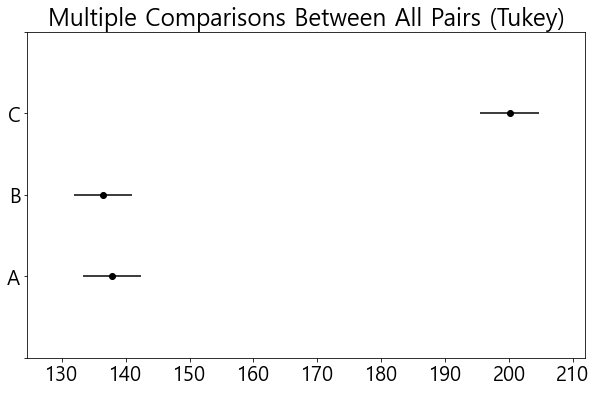

In [20]:
# A B C 결합

Data = A.tolist() + B.tolist() + C.tolist()
Group = ['A']*len(A) + ['B']*len(B) + ['C']*len(C)

len(Data), len(Group)
posthoc = pairwise_tukeyhsd(Data, Group)

posthoc
print(posthoc) # 결과를 보려면 print() 함수를 사용해야 함

# reject 결과를 확인
# [A,B] or [C]로 데이터가 구분
# 3변수에서 C는 다른 집단과 유의한 차이가 존재

fig = posthoc.plot_simultaneous()
